In [1]:
import pandas as pd
import csv

path="C://Users//oorte//Documents//RICE-CLASS-MATERIAL//team3//US_Accidents_June20.csv"
traffic_df = pd.read_csv(path)

In [2]:
#import Dependencies
import time 
import datetime
import numpy as np
from datetime import date

In [3]:
# Read strings representing Start and End of accident
date_start=traffic_df["Start_Time"]
date_end=traffic_df["End_Time"]


In [4]:
#convert string of characters to datetime object
traffic_df['start']=pd.DataFrame(pd.to_datetime(date_start, format='%Y-%m-%d %H:%M:%S'))
traffic_df['end']=pd.DataFrame(pd.to_datetime(date_end, format='%Y-%m-%d %H:%M:%S'))
dfa = pd.DataFrame(traffic_df['start'])
dfb = pd.DataFrame(traffic_df['end'])
#b= traffic_df.columns.get_loc('start')


In [5]:
traffic_df['tss'] = dfa.iloc[:].apply(lambda x: x['start'].timestamp(), axis=1).astype(int)
traffic_df['tse'] = dfb.iloc[:].apply(lambda x: x['end'].timestamp(), axis=1).astype(int)

In [6]:
#create additional columns with datetime object split
traffic_df['year_start'] = pd.DatetimeIndex(traffic_df['start']).year
traffic_df['year_end'] = pd.DatetimeIndex(traffic_df['end']).year

traffic_df['month_start'] = pd.DatetimeIndex(traffic_df['start']).month
traffic_df['month_end'] = pd.DatetimeIndex(traffic_df['end']).month

traffic_df['day_start'] = pd.DatetimeIndex(traffic_df['start']).day
traffic_df['day_end'] = pd.DatetimeIndex(traffic_df['end']).day

traffic_df['time_start'] = pd.DatetimeIndex(traffic_df['start']).time
traffic_df['time_end'] = pd.DatetimeIndex(traffic_df['end']).time


In [7]:
#create additional columns for hour, minutes, seconds
traffic_df['h_start'] = pd.DatetimeIndex(traffic_df['start']).hour
traffic_df['h_end'] = pd.DatetimeIndex(traffic_df['end']).hour

traffic_df['m_start'] = pd.DatetimeIndex(traffic_df['start']).minute
traffic_df['m_end'] = pd.DatetimeIndex(traffic_df['end']).minute

traffic_df['s_start'] = pd.DatetimeIndex(traffic_df['start']).second
traffic_df['s_end'] = pd.DatetimeIndex(traffic_df['end']).second


In [8]:
#calculate accident duration
traffic_df["sec_start"]=traffic_df['h_start']*60*60+traffic_df['m_start']*60+traffic_df['s_start']*1
traffic_df["sec_end"]=traffic_df['h_end']*60*60+traffic_df['m_end']*60+traffic_df['s_end']*1

In [9]:
#if traffic_df["sec_end"]-traffic_df["sec_start"] > 0:
traffic_df["duration"]=traffic_df['tse']-traffic_df['tss']
#traffic_df["duration"]traffic_df["duration"] = np.where(traffic_df["sec_end"] > traffic_df["sec_start"], timespan,"")
traffic_df["duration"]                     


0          18840
1           1800
2           1800
3           1800
4           1800
           ...  
3513612     1716
3513613     1613
3513614     1708
3513615     1761
3513616     1765
Name: duration, Length: 3513617, dtype: int32

In [10]:
#add additional columns needed for seasons determinations
traffic_df['season_start']=traffic_df['month_start']
traffic_df['season_end']=traffic_df['month_end']

In [11]:
#Determine the day of the week
traffic_df['day_of_week'] = traffic_df['start'].dt.day_name()


In [12]:
#seasons definitions (by month)
traffic_df.loc[traffic_df.season_start == 1, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 2, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 12, "season_start"] = "winter"
traffic_df.loc[traffic_df.season_start == 3, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 4, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 5, "season_start"] = "spring"
traffic_df.loc[traffic_df.season_start == 6, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 7, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 8, "season_start"] = "summer"
traffic_df.loc[traffic_df.season_start == 9, "season_start"] = "fall"
traffic_df.loc[traffic_df.season_start == 10, "season_start"] = "fall"
traffic_df.loc[traffic_df.season_start == 11, "season_start"] = "fall"

In [13]:
#Group dataframe according to season
seasons_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['season_start']).count())).iloc[:,1])
seasons_accidents_df.columns=['count']

seasons_accidents_df.reset_index()


,season_start,count
0,fall,916021
1,spring,889432
2,summer,822220
3,winter,885944


In [14]:
import matplotlib.pyplot as plt

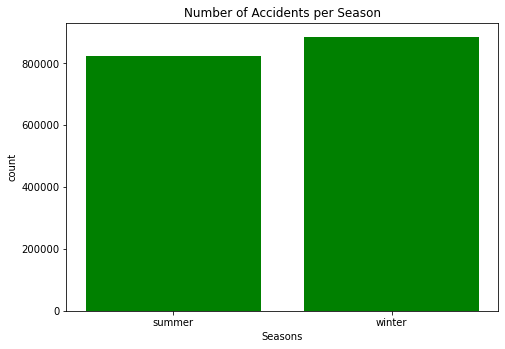

In [15]:
# Generate a bar plot showing the total number of accidents per season.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
seasons = ['summer', 'winter']
count = [seasons_accidents_df['count'][2],seasons_accidents_df['count'][3]]
ax.bar(seasons,count)
plt.bar(seasons, count, color='green')
plt.xlabel("Seasons")
plt.ylabel("count")
plt.title("Number of Accidents per Season")
plt.show()

In [16]:
month_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['month_start']).count())).iloc[:,1])
month_accidents_df.columns=['count']
month_accidents_df.reset_index()

,month_start,count
0,1,301924
1,2,284397
2,3,293389
3,4,299498
4,5,296545
5,6,310322
6,7,222968
7,8,288930
8,9,292420
9,10,324545


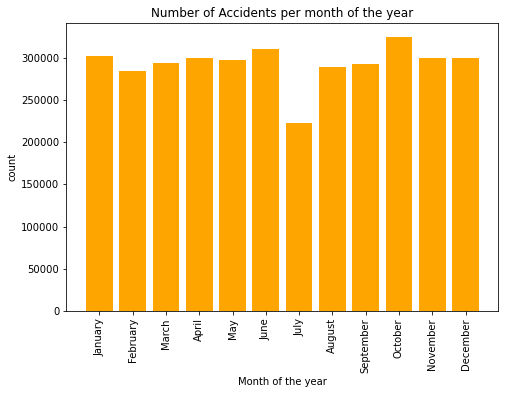

In [17]:
# Generate a bar plot showing the total number of accidents per month.

fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
Month = ['January','February','March','April','May','June','July','August','September','October','November','December']
count = month_accidents_df['count']
ax.bar(Month,count)
plt.bar(Month, count, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Month of the year")
plt.ylabel("count")
plt.title("Number of Accidents per month of the year")
plt.show()

In [18]:
#Group dataframe according to day of the week
wday_accidents_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['day_of_week']).count())).iloc[:,1])
wday_accidents_df.columns=['count']
wday_accidents_df.reset_index()
wday_accidents_df['count']

day_of_week
Friday       639706
Monday       592871
Saturday     214483
Sunday       189315
Thursday     621677
Tuesday      631136
Wednesday    624429
Name: count, dtype: int64

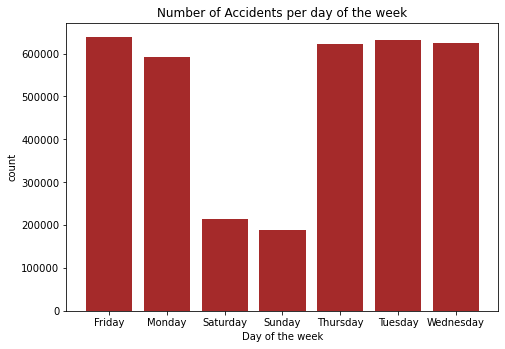

In [19]:
# Generate a bar plot showing the total number of accidents per day of the week.

fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
Day_of_Week = wday_accidents_df.index.tolist()
count = wday_accidents_df['count']
ax.bar(Day_of_Week,count)
plt.bar(Day_of_Week, count, color='brown')
plt.xlabel("Day of the week")
plt.ylabel("count")
plt.title("Number of Accidents per day of the week")
plt.show()

In [20]:
#display header of current dataframe
traffic_df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,46,0,0,0,20760,39600,18840,winter,2,Monday
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,7,37,59,59,22079,23879,1800,winter,2,Monday
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,49,19,27,27,24567,26367,1800,winter,2,Monday
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,23,53,34,34,26614,28414,1800,winter,2,Monday
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,39,9,7,7,27547,29347,1800,winter,2,Monday


In [22]:
#Group dataframe according to day of the week
DurationAvg_df=pd.DataFrame((pd.DataFrame(traffic_df.groupby(['h_start']).mean())).iloc[:,1])
DurationAvg_df.columns=['mean']
DurationAvg_df.reset_index()
DurationAvg_df

,mean
h_start,
0,2.576935
1,2.532253
2,2.553849
3,2.580081
4,2.410549
5,2.379126
6,2.328862
7,2.282088
8,2.273226


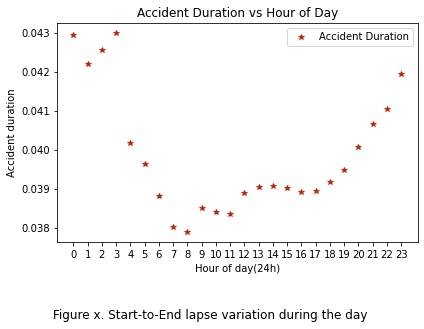

In [23]:
# * Duration of Accident vs. Time of Day
x = DurationAvg_df.index.tolist()
y = DurationAvg_df['mean']/60
plt.plot(x, y, ls="", marker="*", 
         markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="green", 
         label="Accident Duration")
plt.legend(numpoints=1)
plt.xlabel("Hour of day(24h)")
plt.ylabel("Accident duration")
plt.xticks(np.arange(0, 24, 1))
plt.title('Accident Duration vs Hour of Day')
txt1="Figure x. Start-to-End lapse variation during the day "
plt.figtext(0.5, -0.12, txt1, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
traffic_df.to_csv('outAll.csv', index=False)